In [22]:
import urllib
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import random
import numpy as np
from urllib3.exceptions import ReadTimeoutError

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

%matplotlib inline

In [2]:
file = 'api.txt'# replace this with the path and file name you use
with open(file,'r') as f: 
    f = f.read().splitlines()
    spot_id = f[0]
    spot_secret = f[1]

In [62]:
client = SpotifyClientCredentials(client_id=spot_id, client_secret=spot_secret)
sp = spotipy.Spotify(client_credentials_manager=client, requests_timeout=10, retries=10)

In [4]:
with open('genres.json', 'r') as infile:
    valid_genres = json.load(infile)

In [5]:
characters = 'abcdefghijklmnopqrstuvwxyz'
wildcard = characters[random.randrange(26)]

randomif = random.randrange(3)
print(randomif)

if randomif == 0:
    wildcard = wildcard + '%'
elif randomif == 1:
    wildcard = '%' + wildcard
elif randomif == 2:
    wildcard = '%' + wildcard + '%'

offset = random.randrange(1000)
q = wildcard

track = sp.search(q, limit=1, offset=offset, type='track', market=None)

print(track['tracks']['items'][0]['name'])

2
Wake Me Up


In [6]:
print(track['tracks']['items'][0]['artists'][0]['name'])
print(track['tracks']['items'][0]['name'])

artist = track['tracks']['items'][0]['artists'][0]['name']
song = track['tracks']['items'][0]['name']


Avicii
Wake Me Up


In [7]:
track2 = sp.search(q=artist + ' ' + song, type='track')

In [8]:
print(track2['tracks']['items'][0]['artists'][0]['name'])
print(track2['tracks']['items'][0]['name'])
print(track2['tracks']['items'][0]['album']['release_date'][:4])
print(track2['tracks']['items'][0]['popularity'])
print(track2['tracks']['items'][0]['id'])

Avicii
Wake Me Up
2013
84
0nrRP2bk19rLc0orkWPQk2


### From the hour I spent on Google, there is no way of
### getting truly randomized results using the Spotify API. 
### This is the best method I found which I then slighly modified:

<br>

## FIND SOURCE AGAIN.

In [23]:
def get_spotify_data(i):
    """
    Returns information on a random(ish) track from the Spotify API.

    Searches for the random string with a primary search.

    A secondary search is then used because I found some searches resulted in
    duplicate songs that were less popular than the original (e.g. in an album
    of 2010s most popular songs).

    Returns: artist, song, year, popularity, and track id.
    """
    from numpy import nan # we import np.nan to handle empty queries 
    track_ids = []
    popularities = []

    if (i % 1000) == 0:
        print(f'{i} out of 50000')

    characters = 'abcdefghijklmnopqrstuvwxyz'
    wildcard = characters[random.randrange(26)]
    randomif = random.randrange(3)

    if randomif == 0:
        wildcard = wildcard + '%'
    elif randomif == 1:
        wildcard = '%' + wildcard
    elif randomif == 2:
        wildcard = '%' + wildcard + '%'

    offset = random.randrange(1000)
    q = wildcard

    try:
        track1 = sp.search(q, limit=1, offset=offset, type='track', market=None)
        artist = track1['tracks']['items'][0]['artists'][0]['name']
        song = track1['tracks']['items'][0]['name']
    except:
        print('No song found with initial search. Passing.')

    try:
        track2 = sp.search(q=artist + ' ' + song, type='track')
    except:
        print('No song found with secondary search. Saving as NaN.')

    try:
        artist = track2['tracks']['items'][0]['artists'][0]['name']
        song = track2['tracks']['items'][0]['name']
        year = int(track2['tracks']['items'][0]['album']['release_date'][:4])
        popularity = track2['tracks']['items'][0]['popularity']
        track_id = track2['tracks']['items'][0]['id']
    except UnboundLocalError:
        artist = np.nan
        song = np.nan
        year = np.nan
        popularity = np.nan
        track_id = np.nan

    return artist, song, year, popularity, track_id

In [24]:
print(get_spotify_data(0))

0 out of 50000
('Stone Temple Pilots', 'Interstate Love Song - 2019 Remaster', 1994, 71, '6qLEOZvf5gI7kWE63JE7p3')


## Each call of get_spotify_data() takes about 0.3-1s on my computer (3000-10000 per hour).
## 
## I save the csv each time to make sure that time isn't wasted.

In [25]:
df = pd.DataFrame(columns=['Artist', 'Song', 'Year', 'Popularity', 'Track_id'])

for i in range(50000):
    df_length = len(df)
    df.loc[df_length] = get_spotify_data(i)

print(df)
df.isnull().sum()
df.to_csv('songs_raw.csv', index=False)

0 out of 50000
1000 out of 50000
2000 out of 50000
3000 out of 50000
4000 out of 50000
5000 out of 50000
6000 out of 50000
7000 out of 50000
8000 out of 50000
9000 out of 50000
10000 out of 50000
11000 out of 50000
12000 out of 50000
13000 out of 50000
14000 out of 50000
15000 out of 50000
No song found with initial search. Passing.
No song found with secondary search. Saving as NaN.
16000 out of 50000
17000 out of 50000
18000 out of 50000
19000 out of 50000
20000 out of 50000
21000 out of 50000
22000 out of 50000
No song found with initial search. Passing.
No song found with secondary search. Saving as NaN.
23000 out of 50000
24000 out of 50000
25000 out of 50000
26000 out of 50000
27000 out of 50000
28000 out of 50000
29000 out of 50000
30000 out of 50000
31000 out of 50000
32000 out of 50000
33000 out of 50000
34000 out of 50000
35000 out of 50000
36000 out of 50000
37000 out of 50000
38000 out of 50000
No song found with secondary search. Saving as NaN.
39000 out of 50000
40000 out

In [29]:
df = pd.read_csv('songs_raw.csv', header=0, dtype=str)
print(df.head())
print(df.isnull().sum())
df = df.dropna()
df.shape

              Artist                        Song  Year Popularity  \
0  Cage The Elephant         Cigarette Daydreams  2013         79   
1             Grimes                Kill V. Maim  2015         65   
2             K CAMP                 Comfortable  2014         66   
3     Stunna 4 Vegas  UP THE SMOKE (with Offset)  2020         62   
4      Tracy Chapman          Give Me One Reason  1995         68   

                 Track_id  
0  0lkQOB949M2gLyut86aJ1b  
1  3WXhshrs1fzwF3rQE399Gq  
2  2BqQQXuBOuhaWeUP7okEx0  
3  3faAAUxohrxqYhPlneZ3XV  
4  4vDBJeeQCbhP9FaPPMsYkY  
Artist        3
Song          3
Year          3
Popularity    3
Track_id      3
dtype: int64


(49997, 5)

## Next step took around 80 minutes for me (~0.1 second per song). 

## Had to split the dataframe into chunks here due to the audio features search sometimes timing out.

In [58]:
df_dic = {}
for i in range(50):
    x = 0 + i * 1000
    df_dic[i] = df.iloc[x:x + 1000]

In [59]:
df_dic[49]

,Artist,Song,Year,Popularity,Track_id
49003,Linkin Park,BURN IT DOWN,2012,73,7oVEtyuv9NBmnytsCIsY5I
49004,Kodak Black,Heart Mind,2017,73,2OPxM2L3KtuehqY24vTMGs
49005,Quadeca,BEAMIN',2019,64,4JlOPpMwwZTfT0wDsuBBOc
49006,Chase Rice,Lonely If You Are,2021,65,1iyE0UwRtLUBf9OqLfFGSp
49007,Sasha Alex Sloan,when was it over? (feat. Sam Hunt),2021,71,779UN3kabApm2zfqX549vf
...,...,...,...,...,...
49995,Joel Corry,OUT OUT (feat. Charli XCX & Saweetie),2021,87,6Dy1jexKYriXAVG6evyUTJ
49996,Bad Bunny,ANTES QUE SE ACABE,2020,75,7kjEqI6eZ7YlFrGhxixnlN
49997,Chris Webby,Story Of My Life (feat. Millyz & Xander Goodhe...,2020,47,1DrtUYV4YVGuLvZoh8LTmz
49998,TOOL,Forty Six & 2,1996,66,6AioOohg4bQZFA4jIYQQ2r


In [60]:
df_chunk = df_dic[0]
# using list comprehension test
features = [sp.audio_features(id_) for id_ in df_chunk['Track_id']]
features[0]

[{'danceability': 0.636,
  'energy': 0.676,
  'key': 2,
  'loudness': -3.442,
  'mode': 1,
  'speechiness': 0.0263,
  'acousticness': 0.0807,
  'instrumentalness': 0,
  'liveness': 0.0831,
  'valence': 0.273,
  'tempo': 113.98,
  'type': 'audio_features',
  'id': '0lkQOB949M2gLyut86aJ1b',
  'uri': 'spotify:track:0lkQOB949M2gLyut86aJ1b',
  'track_href': 'https://api.spotify.com/v1/tracks/0lkQOB949M2gLyut86aJ1b',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0lkQOB949M2gLyut86aJ1b',
  'duration_ms': 208760,
  'time_signature': 4}]

In [93]:
def audio_feats(df_chunk):
    """"
    Create a dataframe with the audio features from Spotify.
    
    The search function will timeout after ~20 minutes so ensure your dataframe is not too large.

    Input: dataframe containing song titles, artists, etc.
    Output: dataframe containing 
    """
    try:
        features = [sp.audio_features(id_) for id_ in df_chunk['Track_id']]
    except ReadTimeoutError:
        features = [sp.audio_features(id_) for id_ in df_chunk['Track_id']]
    todrop = []
    features2 = features

    for i in range(len(features)):
        item = features[i][0]
        if item == None:
            todrop.append(i + df_chunk.index[0])

    print(todrop)
    try:
        df2 = df_chunk.drop(todrop)
    except KeyError:
        raise KeyError
    todrop = todrop[::-1]  # Flips list so indexes are removed properly in the next step.

    for i in range(len(todrop)):
        del features2[todrop[i] - df_chunk.index[0]]

    #STEP 1
    k = list(features2[0][0].keys())
    # STEP 2
    dict_list = {}
    for key in k:
        dict_list[key] = []
    # STEP 3
    for i in features2:
        item = i[0].items()
        for pair in item:
            key, value = pair
            dict_list[key].append(value)
    # STEP 4
    for key in dict_list.keys():
        df2[key] = dict_list[key]

    columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url']
    df2.drop(columns_to_drop, axis=1, inplace=True)

    return df2

In [78]:
# Create dataframe with audio features for the first chunk.
df2 = audio_feats(df_dic[0])
print(0)

KeyboardInterrupt: 

In [91]:
df2

,Artist,Song,Year,Popularity,Track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cage The Elephant,Cigarette Daydreams,2013,79,0lkQOB949M2gLyut86aJ1b,0.636,0.676,2,-3.442,1,0.0263,0.080700,0.000000,0.0831,0.273,113.980,208760,4
1,Grimes,Kill V. Maim,2015,65,3WXhshrs1fzwF3rQE399Gq,0.578,0.947,11,-2.431,0,0.0359,0.007440,0.081600,0.1050,0.456,134.033,246007,4
2,K CAMP,Comfortable,2014,66,2BqQQXuBOuhaWeUP7okEx0,0.765,0.412,7,-8.932,0,0.0726,0.720000,0.000000,0.1260,0.632,109.986,211573,4
3,Stunna 4 Vegas,UP THE SMOKE (with Offset),2020,62,3faAAUxohrxqYhPlneZ3XV,0.899,0.735,4,-7.719,1,0.4000,0.050600,0.000000,0.1500,0.884,143.001,188107,4
4,Tracy Chapman,Give Me One Reason,1995,68,4vDBJeeQCbhP9FaPPMsYkY,0.608,0.419,11,-10.016,1,0.0331,0.602000,0.000008,0.1080,0.602,100.220,268333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Seether,Remedy,2005,69,5ynxx6zC4dgzsMHLYQ04Dc,0.550,0.952,8,-4.664,1,0.0924,0.000193,0.000666,0.0614,0.391,127.804,207213,4
6996,Thomas Rhett,Country Again,2021,71,3CiF9D8iuVhZWDvvjf8HpG,0.467,0.481,2,-6.947,1,0.0255,0.227000,0.000189,0.1100,0.248,147.886,221240,4
6997,Dolly Parton,9 to 5,1980,75,4w3tQBXhn5345eUXDGBWZG,0.554,0.783,6,-5.852,1,0.0457,0.416000,0.000002,0.6310,0.813,105.390,162467,4
6998,Marvin Gaye,What's Going On,1971,70,3Um9toULmYFGCpvaIPFw7l,0.283,0.716,1,-9.632,0,0.0986,0.447000,0.000000,0.3990,0.828,201.960,233000,4


In [94]:
# Then add the other chunks to that dataframe with concat.
for y in range(1, 50):
    df_add = audio_feats(df_dic[y])
    df2 = pd.concat([df2, df_add])
    df2.to_csv('songs_data_2.csv', index=False)
    print(y)

[7235]
7
[]
8
[]
9
[]
10
[]
11
[]
12
[]
13
[]
14
[]
15
[]
16
[]
17
[]
18
[]
19
[]
20
[]
21
[22071]
22
[]
23
[]
24
[]
25
[]
26
[]
27
[]
28
[29489]
29
[]
30
[]
31
[]
32
[33984]
33
[]
34
[]
35
[]
36
[]
37
[]
38
[]
39
[]
40
[]
41
[]
42
[]
43
[44426, 44802]
44
[45437]
45
[]
46
[]
47
[]
48
[]
49


In [95]:
df2.isnull().sum()

Artist              0
Song                0
Year                0
Popularity          0
Track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [109]:
df2 = pd.read_csv('songs_data_2.csv', header=0)  # , dtype=str)
print(df2.shape)
df2.isnull().sum()

(49990, 18)


Artist              0
Song                0
Year                0
Popularity          0
Track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [110]:
# # Get names of indexes for which pop is < 30
# indexNames = df2[ df2['Popularity'] < 30 ].index
# # Delete these row indexes from dataFrame

# df2.drop(indexNames , inplace=True)

<AxesSubplot:xlabel='energy', ylabel='Popularity'>

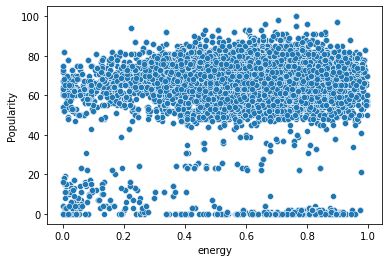

In [111]:
sns.scatterplot(data=df2, x='energy', y='Popularity')

In [112]:
# Something looks weird here. It seems popularity is stored as strings.
# I'll switch it to intergers.

# This will be different if you loaded the csv.

df2['Popularity'] = df2['Popularity'].apply(int)

<AxesSubplot:xlabel='energy', ylabel='Popularity'>

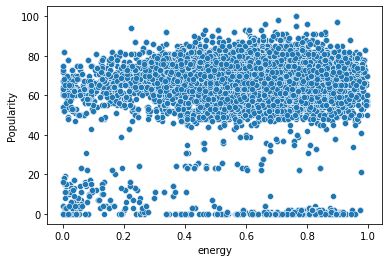

In [113]:
sns.scatterplot(data=df2, x='energy', y='Popularity')

<AxesSubplot:xlabel='danceability', ylabel='Popularity'>

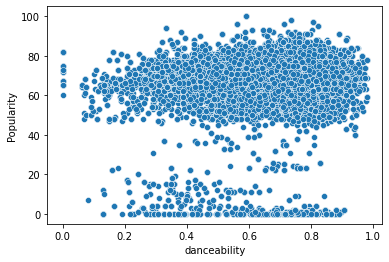

In [114]:
sns.scatterplot(data=df2, x='danceability', y='Popularity')

<AxesSubplot:xlabel='loudness', ylabel='Popularity'>

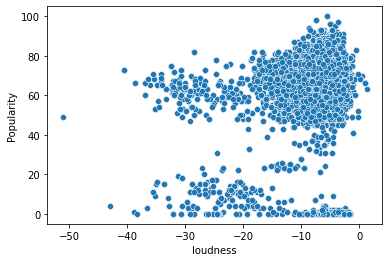

In [115]:
sns.scatterplot(data=df2, x='loudness', y='Popularity')

<AxesSubplot:xlabel='instrumentalness', ylabel='Popularity'>

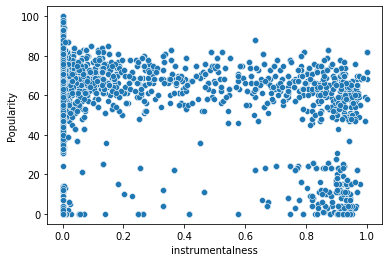

In [116]:
sns.scatterplot(data=df2, x='instrumentalness', y='Popularity')

<AxesSubplot:xlabel='tempo', ylabel='Popularity'>

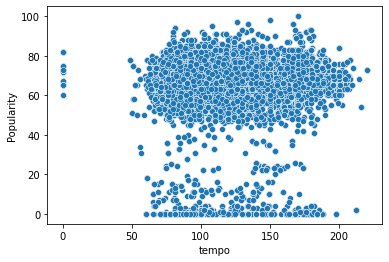

In [117]:
sns.scatterplot(data=df2, x='tempo', y='Popularity')

<AxesSubplot:xlabel='liveness', ylabel='Popularity'>

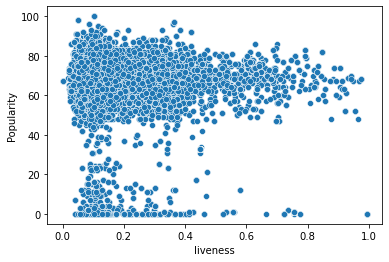

In [118]:
sns.scatterplot(data=df2, x='liveness', y='Popularity')

<AxesSubplot:xlabel='duration_ms', ylabel='Popularity'>

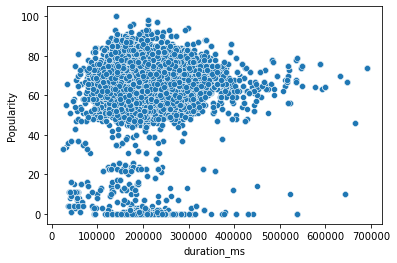

In [119]:
sns.scatterplot(data=df2, x='duration_ms', y='Popularity')

### To my eye it seems there are three groupings of popularity:
###   - the largest is above around 30,
###   - then between 30 and 10,
###   - and finally below 5. 

<br>

### Will removing one or both of these help the model?

In [120]:
print(df2.corr()['Popularity'])

Year               -0.090802
Popularity          1.000000
danceability        0.018599
energy              0.036883
key                -0.000107
loudness            0.150888
mode                0.028069
speechiness        -0.019478
acousticness       -0.097674
instrumentalness   -0.213609
liveness           -0.018357
valence            -0.076698
tempo              -0.015697
duration_ms         0.054276
time_signature      0.015694
Name: Popularity, dtype: float64


In [121]:
df2.head()

,Artist,Song,Year,Popularity,Track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cage The Elephant,Cigarette Daydreams,2013,79,0lkQOB949M2gLyut86aJ1b,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,208760,4
1,Grimes,Kill V. Maim,2015,65,3WXhshrs1fzwF3rQE399Gq,0.578,0.947,11,-2.431,0,0.0359,0.00744,0.081600,0.1050,0.456,134.033,246007,4
2,K CAMP,Comfortable,2014,66,2BqQQXuBOuhaWeUP7okEx0,0.765,0.412,7,-8.932,0,0.0726,0.72000,0.000000,0.1260,0.632,109.986,211573,4
3,Stunna 4 Vegas,UP THE SMOKE (with Offset),2020,62,3faAAUxohrxqYhPlneZ3XV,0.899,0.735,4,-7.719,1,0.4000,0.05060,0.000000,0.1500,0.884,143.001,188107,4
4,Tracy Chapman,Give Me One Reason,1995,68,4vDBJeeQCbhP9FaPPMsYkY,0.608,0.419,11,-10.016,1,0.0331,0.60200,0.000008,0.1080,0.602,100.220,268333,4


## Start the modeling here.

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [123]:
X = df2.drop(['Artist', 'Song', 'Popularity', 'time_signature', 'Track_id'], axis=1)
y = df2['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(34993, 13)

In [125]:
X_test.shape

(14997, 13)

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [31]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [32]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
55/55 [==============================] - 0s 3ms/step - loss: 4790.9814 - val_loss: 4503.4438
Epoch 2/400
55/55 [==============================] - 0s 920us/step - loss: 3415.9229 - val_loss: 1332.6040
Epoch 3/400
55/55 [==============================] - 0s 966us/step - loss: 514.1033 - val_loss: 412.9083
Epoch 4/400
55/55 [==============================] - 0s 961us/step - loss: 379.1773 - val_loss: 404.2061
Epoch 5/400
55/55 [==============================] - 0s 923us/step - loss: 369.2609 - val_loss: 396.8001
Epoch 6/400
55/55 [==============================] - 0s 971us/step - loss: 360.3089 - val_loss: 389.1049
Epoch 7/400
55/55 [==============================] - 0s 953us/step - loss: 352.3306 - val_loss: 384.1865
Epoch 8/400
55/55 [==============================] - 0s 923us/step - loss: 345.6909 - val_loss: 378.4215
Epoch 9/400
55/55 [==============================] - 0s 947us/step - loss: 339.5174 - val_loss: 373.8894
Epoch 10/400
55/55 [==============================] -

In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

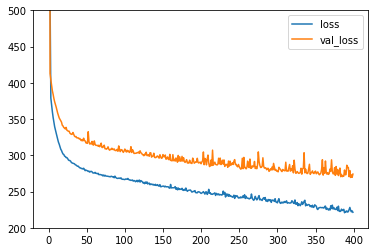

In [37]:
losses.plot(ylim=[200,500])

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [39]:
predictions = model.predict(X_test)

In [40]:
explained_variance_score(y_test,predictions)

0.1928228417577742

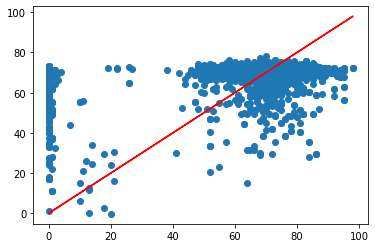

In [41]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

C:\Users\PKLab\miniconda3\envs\learn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

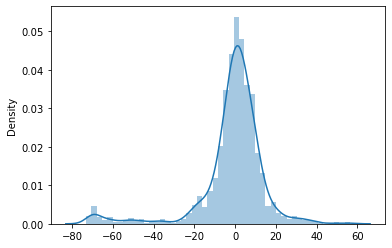

In [43]:
errors = y_test.values.reshape(2980, 1) - predictions
sns.distplot(errors)

In [44]:
# Our predictions
plt.scatter(X_test['energy'],predictions


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices